<a href="https://colab.research.google.com/github/Alao001/ML_Projects/blob/main/Developers_Salaries_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim of The Project

In today's rapidly evolving tech landscape, understanding salary trends for software developers is crucial for both professionals and organizations. This project aims to leverage machine learning to predict software developer salaries based on various factors such as experience, location, skills, and company size.

By accurately predicting salaries, we can gain valuable insights into the job market, identify trends, and assist developers in making informed career decisions. The model utilizes Random Forest to analyze a comprehensive dataset of software developer profiles and their corresponding salaries.

About The Dataset

The dataset was the survey conducted by Stack overflow in May 2024,where over 65,000 developers responded to the annual survey about coding, the technologies and tools they use and want to learn, AI, and developer experience at work.

Importing the Dependecies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset into dataframe
salary_data = pd.read_csv('/content/sample_data/survey_results_public.csv')
salary_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Select the important columns
salary_data = salary_data[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]


In [4]:
#rename 'ConvertedCompYearly' column to 'Salary'
salary_data = salary_data.rename(columns={'ConvertedCompYearly': 'Salary'})

In [5]:
salary_data.head()


,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [6]:
# Print shape
salary_data.shape

(65437, 5)

In [7]:
# Drop rows with no Salary
salary_data = salary_data[salary_data['Salary'].notna()]
salary_data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [8]:
# print shape
salary_data.shape

(23435, 5)

In [9]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [10]:
# check no of missing values
salary_data.isnull().sum()

,0
Country,0
EdLevel,0
YearsCodePro,90
Employment,0
Salary,0


In [11]:
# drop missing values
salary_data = salary_data.dropna()

In [12]:
salary_data.isnull().sum()


,0
Country,0
EdLevel,0
YearsCodePro,0
Employment,0
Salary,0


In [13]:
salary_data.shape

(23345, 5)

In [14]:
# Filter only full time employees
salary_data = salary_data[salary_data['Employment'] == 'Employed, full-time']
salary_data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,"Employed, full-time",161044.0
395,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,"Employed, full-time",121018.0
398,United States of America,Some college/university study without earning ...,30,"Employed, full-time",195000.0


In [15]:
# Drop 'Employment' Column
salary_data = salary_data.drop('Employment', axis=1)
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17527 non-null  object 
 1   EdLevel       17527 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17527 non-null  float64
dtypes: float64(1), object(3)
memory usage: 684.6+ KB


In [16]:
# Get an overview of the countries of the developers are staying at
salary_data['Country'].value_counts()

,count
Country,
United States of America,3903
Germany,1491
United Kingdom of Great Britain and Northern Ireland,1141
Ukraine,1017
India,836
...,...
Kosovo,1
Oman,1
Guyana,1


In [17]:
# Create a function to compile the countries with smaller values into "Others" categories
def compile_countries(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Others"
    return categorical_map

In [18]:
country_map = compile_countries(salary_data.Country.value_counts(), 400)
salary_data['Country'] = salary_data['Country'].map(country_map)

In [19]:
salary_data.Country.value_counts()

,count
Country,
Others,5628
United States of America,3903
Germany,1491
United Kingdom of Great Britain and Northern Ireland,1141
Ukraine,1017
India,836
France,719
Canada,684
Brazil,457


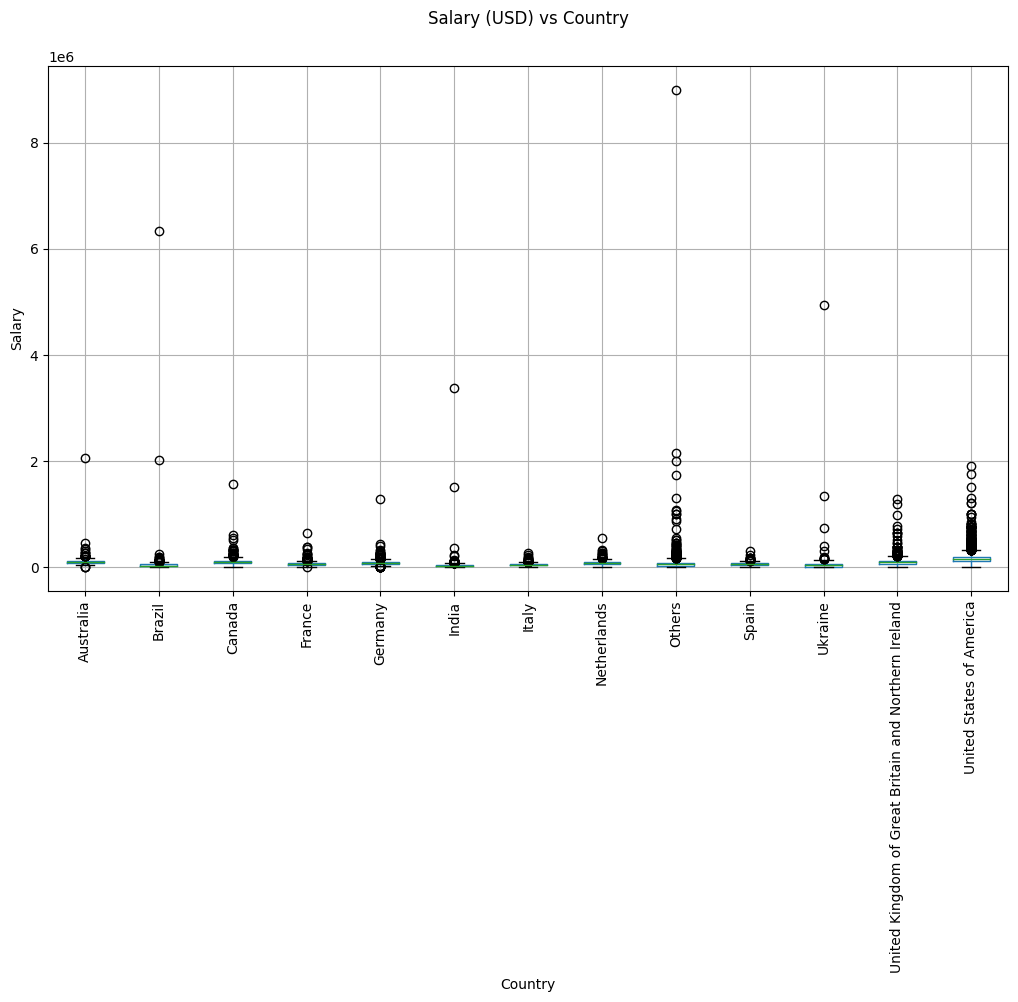

In [20]:
#Plot a boxplot to visualize the relationship between countries and salaries and identify any possible outliers
fig, ax = plt.subplots(1,1, figsize=(12, 7))
salary_data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [21]:
salary_data = salary_data[salary_data["Salary"] <= 250000]
salary_data = salary_data[salary_data["Salary"] >= 10000]
salary_data = salary_data[salary_data["Country"] != "Others"]

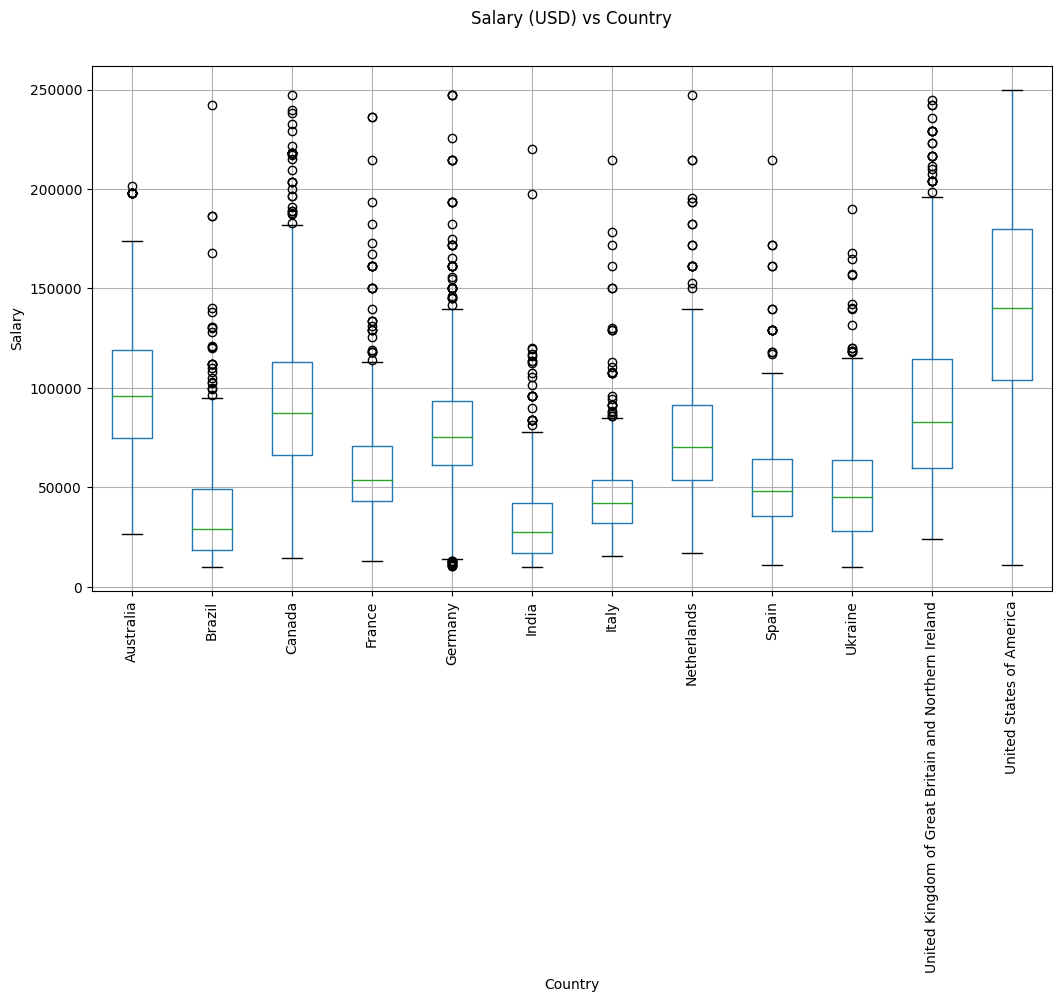

In [22]:
#Plot a boxplot to visualize the relationship between countries and salaries and identify any possible outliers
fig, ax = plt.subplots(1,1, figsize=(12, 7))
salary_data.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USD) vs Country')
plt.title('')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [23]:
salary_data["YearsCodePro"].unique()

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '12', '26', '40', '4', '9', '22', '28', '20', '16', '13', '3',
       '35', '5', '31', '41', '36', '6', '14', '7', 'Less than 1 year',
       '24', '2', '38', '32', '21', '19', '34', '29', '43', '33', '45',
       '37', '44', '42', '39', '46', '49', '48', '47'], dtype=object)

In [24]:
# Create a function to standardize and clean the coding experience column
# Convert Coding Experience Column into float data type
def clean_yearsCodePro(x):
    if x == 'Less than 1 year':
        return 0.5
    return float(x)


In [25]:
salary_data['YearsCodePro'] = salary_data['YearsCodePro'].apply(clean_yearsCodePro)

In [26]:
salary_data["YearsCodePro"].unique()

array([18. , 25. , 30. , 50. , 27. ,  1. , 15. , 11. , 23. , 17. , 10. ,
        8. , 12. , 26. , 40. ,  4. ,  9. , 22. , 28. , 20. , 16. , 13. ,
        3. , 35. ,  5. , 31. , 41. , 36. ,  6. , 14. ,  7. ,  0.5, 24. ,
        2. , 38. , 32. , 21. , 19. , 34. , 29. , 43. , 33. , 45. , 37. ,
       44. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [27]:
#salary_data['WorkExp'].unique()

In [28]:
# Cleaning 'Edlevel' column
salary_data['EdLevel'].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [29]:
# Clean education column into a few categories
def clean_edLevel(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Postgraduate"
    return "Less than a Bachelors"

In [30]:
salary_data['EdLevel'] = salary_data["EdLevel"].apply(clean_edLevel)

In [31]:
salary_data['EdLevel'].unique()

array(['Postgraduate', "Master's degree", 'Less than a Bachelors',
       "Bachelor's degree"], dtype=object)

In [32]:
# Transform string values into a unique float value (so that the model could understand)
from sklearn.preprocessing import LabelEncoder
le_edLevel = LabelEncoder()
salary_data['EdLevel'] = le_edLevel.fit_transform(salary_data['EdLevel'])

In [33]:
salary_data['EdLevel'].unique()

array([3, 2, 1, 0])

In [34]:
le_country = LabelEncoder()
salary_data['Country'] = le_country.fit_transform(salary_data['Country'])

In [35]:
salary_data['Country'].unique()

array([10, 11,  3,  4,  1,  2,  6,  5,  9,  8,  7,  0])

Training the Model

In [36]:
#Split dataset into features(x) and label(y)
X = salary_data.drop("Salary", axis=1)
y = salary_data["Salary"]

In [37]:
#Split dataset into training & testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = linear_reg.predict(x_test)

In [40]:
from sklearn.metrics import r2_score,mean_squared_error
linear_score=r2_score(y_test,y_pred)
print(linear_score)

0.305460652008536


In [41]:
linear_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(linear_rmse)

45919.79067217668


In [42]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
y_pred = dec_tree_reg.predict(x_test)


In [44]:
dec_tree_score=r2_score(y_test,y_pred)
dec_tree_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(dec_tree_score)
print(dec_tree_rmse)

0.5452608200183696
37156.31698853125


In [45]:
from sklearn.ensemble import RandomForestRegressor
ran_forest_reg = RandomForestRegressor(random_state=0)
ran_forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [46]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [47]:
y_pred = ran_forest_reg.predict(x_test)

In [48]:
ran_forest_score=r2_score(y_test,y_pred)
ran_forest_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(ran_forest_score)
print(ran_forest_rmse)

0.5647286641973484
36352.26756390415


In [49]:
X

,Country,EdLevel,YearsCodePro
392,10,3,18.0
395,10,2,25.0
398,11,1,30.0
409,3,3,50.0
414,10,0,27.0
...,...,...,...
41163,11,0,2.0
41164,11,0,13.0
41167,11,1,25.0
41184,11,2,30.0


In [50]:
y

,Salary
392,161044.0
395,121018.0
398,195000.0
409,57999.0
414,184712.0
...,...
41163,124000.0
41164,94000.0
41167,100000.0
41184,170000.0


In [51]:
import pickle

In [52]:
data = {"model":ran_forest_reg, "le_country":le_country, "le_edLevel":le_edLevel,}
# open a pickle file in write binary mode
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [53]:
# check our pickle file by opening the file in read binary mode
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

ran_forest_loaded = data['model']
le_country = data['le_country']
le_edLevel = data['le_edLevel']


In [54]:
y_pred = ran_forest_loaded.predict(x_test)
print(y_pred)
pred_score= r2_score(y_test,y_pred)
pred_score

[104146.36294995 146989.24542041 136942.22374432 ...  80215.6784127
 146251.92547512  67119.62162309]


0.5647286641973484

In [55]:
! pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [56]:
!wget -q -O - ipv4.icanhazip.com

34.125.197.126


In [57]:
%%writefile predict_page.py
import streamlit as st
import pickle
import numpy as np
def load_model():
    with open('saved_steps.pkl', 'rb') as file:
        data = pickle.load(file)
    return data

data = load_model()

ran_forest_loaded = data['model']
le_country = data['le_country']
le_edLevel = data['le_edLevel']

def show_predict_page():
    st.title(" Developers Salary Prediction Web App")

    st.write("""### Select the information below to predict the salary""")

    countries = (
        "United States of America",
        "India",
        "United Kingdom",
        "Germany",
        "Canada",
        "Brazil",
        "France",
        "Spain",
        "Australia",
        "Netherlands",
        "Poland",
        "Italy",
        "Russian Federation",
        "Sweden",
    )

    education = (
        "Less than a Bachelors",
        "Bachelor's degree",
        "Master's degree",
        "Postgraduate",
    )

    country = st.selectbox("Country", countries)
    education = st.selectbox("Education Level", education)

    expericence = st.slider("Years of Experience", 0, 50, 5)

    ok = st.button("Predict Salary")
    if ok:
        X = np.array([[country, education, expericence ]])
        X[:, 0] = le_country.transform(X[:,0])
        X[:, 1] = le_edLevel.transform(X[:,1])
        X = X.astype(float)

        salary = ran_forest_loaded.predict(X)
        st.subheader(f"The estimated predicted salary is ${salary[0]:.2f}")


Writing predict_page.py


In [58]:
%%writefile explore_page.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map


def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)


def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'


@st.cache
def load_data():
    salary_data = pd.read_csv("/content/sample_data/survey_results_public.csv")
    salary_data = salary_data[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
    salary_data = salary_data[salary_data["ConvertedCompYearly"].notnull()]
    salary_data = salary_data.dropna()
    salary_data = salary_data[salary_data["Employment"] == "Employed full-time"]
    salary_data = salary_data.drop("Employment", axis=1)

    country_map = shorten_categories(salary_data.Country.value_counts(), 400)
    salary_data["Country"] = salary_data["Country"].map(country_map)
    salary_data = salary_data[salary_data["ConvertedCompYearly"] <= 250000]
    salary_data = salary_data[salary_data["ConvertedCompYearly"] >= 10000]
    salary_data = salary_data[salary_data["Country"] != "Other"]

    salary_data["YearsCodePro"] = salary_data["YearsCodePro"].apply(clean_experience)
    salary_data["EdLevel"] = salary_data["EdLevel"].apply(clean_education)
    salary_data = salary_data.rename({"ConvertedCompYearly": "Salary"}, axis=1)
    return salary_data

salary_data = load_data()

def show_explore_page():
    st.title("Explore Software Engineer Salaries")

    st.write(
        """
    ### Stack Overflow Developer Survey 2024
    """
    )

    data = salary_data["Country"].value_counts()

    fig1, ax1 = plt.subplots()
    ax1.pie(data, labels=data.index, autopct="%1.1f%%", shadow=True, startangle=90)
    ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    st.write("""#### Number of Data from different countries""")

    st.pyplot(fig1)

    st.write(
        """
    #### Mean Salary Based On Country
    """
    )

    data = salary_data.groupby(["Country"])["Salary"].mean().sort_values(ascending=True)
    st.bar_chart(data)

    st.write(
        """
    #### Mean Salary Based On Experience
    """
    )

    data = salary_data.groupby(["YearsCodePro"])["Salary"].mean().sort_values(ascending=True)
    st.line_chart(data)

Writing explore_page.py


In [59]:
%%writefile app.py
import streamlit as st
from predict_page import show_predict_page
from explore_page import show_explore_page
page = st.sidebar.selectbox("Explore Or Predict", ("Predict", "Explore"))


if page == "Predict":
    show_predict_page()
else:
    show_explore_page()

Writing app.py


In [60]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [61]:
!streamlit run predict_page.py &>/content/logs.txt &

In [62]:
!npx localtunnel --port 8501

your url is: https://spotty-buckets-scream.loca.lt
^C


In [63]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.125.197.126
your url is: https://hungry-wings-travel.loca.lt
